# 🧠 K-Means Clustering & ML Pipeline Example

This notebook demonstrates how to use K-Means clustering within a machine learning pipeline.  
Markdown cells like this are used to describe and document your workflow, making your analysis easier to understand and share.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score


## 1. Data Loading and Exploration

**Goal:** Understand the dataset’s structure, features, and target variables.

**Problem We’re Solving:** Avoid working blind. Skipping exploration can lead to misinterpretation, poor modeling choices, or biased clusters.

In [6]:
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target
df = X.copy()
df['target'] = y
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


We’re loading the Iris dataset—a classic example—with four numeric features. We’re using this to simulate a real-world classification problem, which we’ll approach without labels in unsupervised learning.

**What is the Iris dataset?**  
It’s a famous dataset in machine learning, containing 150 flowers. Each flower has 4 measurements: sepal length, sepal width, petal length, and petal width. There are 3 types of flowers (species), but for clustering, we pretend we don’t know the species.

**What’s the problem we’re solving?**  
We want to group similar flowers together automatically, without using the species labels. This is called *unsupervised learning*—specifically, clustering. The goal is to see if the algorithm can find natural groupings in the data that match the real species.

## 2. Feature Scaling

**Goal:** Standardize the data so features contribute equally.

**Problem We’re Solving:** K-Means and PCA are distance-based—they get skewed when features are on different scales (e.g., centimeters vs. petal count).

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


StandardScaler ensures all features have zero mean and unit variance. This step is critical—no scaling, no meaningful clustering.

### 3. K-Means Clustering

**Goal:** Partition data into K groups where intra-group similarity is high.

**Problem We’re Solving:** Automatically uncover structure or subpopulations in the data when we don’t have labels.

In [9]:
# 1. Create a KMeans clustering model with 3 clusters and a fixed random seed for reproducibility
kmeans = KMeans(n_clusters=3, random_state=42)

# 2. Fit the KMeans model to the scaled feature data and predict the cluster for each sample
clusters = kmeans.fit_predict(X_scaled)

# 3. Add the predicted cluster labels as a new column in the dataframe for analysis and visualization
df['cluster'] = clusters


We’re trying to let the model find species-like groupings on its own, simulating real business problems like segmenting customers or behaviors.

## 4. Visualizing Clustering with PCA
Goal: Reduce dimensionality and visualize clusters in 2D. Problem We’re Solving: Human brains don’t do well in 4D—PCA helps translate high-dimensional clustering into a 2D plot for interpretation and validation.

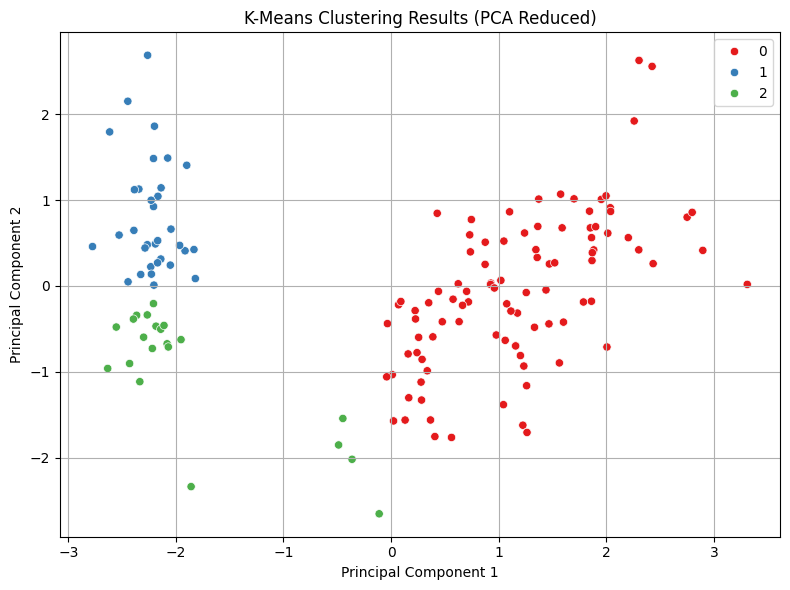

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set1')
plt.title("K-Means Clustering Results (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()


Plotting this shows us how well-separated the clusters are, giving confidence in the quality of K-Means output.

The scatter plot above shows the results of K-Means clustering on the Iris dataset, projected into two dimensions using PCA. Each point represents a flower, colored by its assigned cluster. Well-separated groups indicate that K-Means has successfully identified distinct patterns in the data, suggesting meaningful natural groupings even without using the true species labels. This visualization helps us quickly assess the quality and separation of the clusters.

## 5. Feature Engineering

**Goal:** Make raw data more informative and model-friendly.

**Problem We’re Solving:** Raw features may hide structure or make learning inefficient. We must extract, encode, or transform features to give ML models more leverage.

**Examples include:**
- Handling categorical variables via label or one-hot encoding
- Transforming skewed data (log/sqrt)
- Deriving new features (e.g., ratios, domain-specific metrics)


 **Feature Engineering: Extract meaningful signals (e.g., interactions, log transforms)**

### Categorical Encoding:

**Label Encoding:**  
Assigns each unique category a numeric value. Useful for ordinal data or as a quick way to convert categories, but can mislead models into thinking there’s an order.

Example:  
`data['Color_encoded'] = LabelEncoder().fit_transform(data['Color'])`  
Here, "Red", "Blue", "Green" become 2, 0, 1.

**One-Hot Encoding:**  
Creates a new binary column for each category. Prevents algorithms from assuming any ordinal relationship between categories.

Example:  
`data_ohe = pd.get_dummies(data, columns=['Color'])`  
This produces columns like `Color_Red`, `Color_Blue`, `Color_Green`, each with True/False values.

**When to use which?**  
- Use label encoding for ordinal categories (where order matters).
- Use one-hot encoding for nominal categories (no order).  
Most ML models (including K-Means) work best with one-hot encoding for categorical features.

In [15]:
# For example purposes, create a sample dataset
data = pd.DataFrame({
    'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red'],
    'Value': [10, 20, 15, 10, 30]
})

# Label Encoding
data['Color_encoded'] = LabelEncoder().fit_transform(data['Color'])

# One-Hot Encoding
data_ohe = pd.get_dummies(data, columns=['Color'])


In [16]:
print("Label Encoded Data:")
print(data[['Color', 'Color_encoded']])

print("\nOne-Hot Encoded Data:")
print(data_ohe)

Label Encoded Data:
   Color  Color_encoded
0    Red              2
1   Blue              0
2  Green              1
3   Blue              0
4    Red              2

One-Hot Encoded Data:
   Value  Color_encoded  Color_Blue  Color_Green  Color_Red
0     10              2       False        False       True
1     20              0        True        False      False
2     15              1       False         True      False
3     10              0        True        False      False
4     30              2       False        False       True


**Scaling:**  
Scaling means adjusting the values of features (columns) in your data so they are on a similar scale. This is important because many machine learning algorithms (like K-Means and PCA) use distances between points, and features with larger values can dominate the results.

- `StandardScaler()` transforms each feature so it has a mean of 0 and a standard deviation of 1 (z-score normalization).
- `MinMaxScaler()` scales each feature to a given range, usually 0 to 1.

**Why scale?**  
If you don’t scale, features like “petal length” (which might range from 1–7) could outweigh “petal width” (which might range from 0–2), making the algorithm focus more on one feature than others.

**Combining with Pipeline:**  
A `Pipeline` lets you chain together multiple steps (like scaling and clustering) so you can process your data in a clean, repeatable way. For example, you can first scale your data, then apply K-Means clustering—all in one go. This is helpful for keeping your code organized and avoiding mistakes.

In [12]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('kmeans', KMeans(n_clusters=3, random_state=42))
])
pipeline.fit(X)


,steps,"[('scaler', ...), ('pca', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_components,2
,copy,True
,whiten,False
,svd_solver,'auto'


## Cross-Validation & Metrics

**Cross-validation** is a robust technique to evaluate the performance of machine learning models. Instead of splitting the data just once into training and test sets, cross-validation divides the data into multiple folds (subsets), trains the model on some folds, and tests it on the remaining fold(s). This process repeats so every data point is used for both training and validation. The most common method is *k*-fold cross-validation (e.g., 5-fold), which helps reduce bias and variance in model evaluation.

**Why use cross-validation?**
- Provides a more reliable estimate of model performance.
- Helps detect overfitting or underfitting.
- Useful when data is limited.

**Metrics** are quantitative measures used to assess model quality. For clustering (unsupervised learning), common metrics include:
- **Adjusted Rand Index (ARI):** Measures similarity between true labels and predicted clusters, adjusted for chance. Ranges from -1 (bad) to 1 (perfect match), with 0 indicating random labeling.
- **Silhouette Score:** Evaluates how similar an object is to its own cluster compared to other clusters. Ranges from -1 to 1; higher is better.
- **Inertia (Within-Cluster Sum of Squares):** Measures how tightly grouped the clusters are; lower values are better.

In this notebook, we use cross-validation with the Adjusted Rand Index to evaluate clustering performance. This helps ensure our clustering model generalizes well to new, unseen data.

In [ ]:
scores = cross_val_score(KMeans(n_clusters=3, random_state=42), X_scaled, cv=5, scoring='adjusted_rand_score')
print("Adjusted Rand Index (CV):", scores.mean())


# Model Evaluation

**Goal:** Measure how well the clustering or ML model is performing.  
**Problem We’re Solving:** Without metrics or validation, you're guessing. Cross-validation and inertia plots help quantify quality.

- **Elbow method:** Helps choose the best number of clusters (K) by plotting inertia (within-cluster sum of squares) for different K values and looking for the "elbow" point where adding more clusters yields diminishing returns.
- **Silhouette score / Adjusted Rand Index (ARI):** Validate cluster consistency and compare clustering results to ground truth (if available).  
    - *Silhouette score* measures how similar each point is to its own cluster vs. other clusters.
    - *ARI* compares the similarity between predicted clusters and true labels, adjusted for chance.

Combining these tools gives a more complete picture of clustering quality and helps avoid overfitting or underfitting.

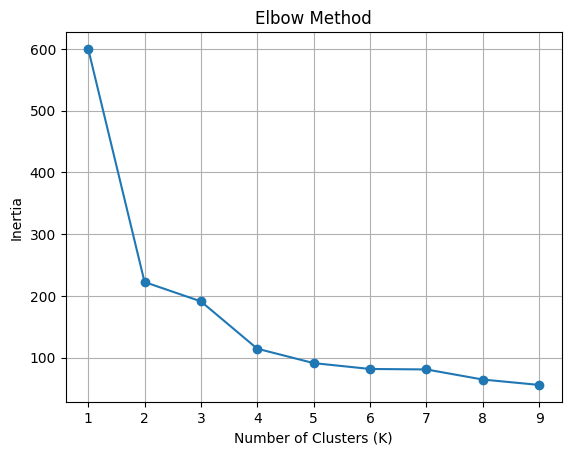

In [17]:
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


### Understanding the Elbow Method Chart

The Elbow Method chart helps you choose the best number of clusters (K) for K-Means clustering.

- **X-axis:** Number of clusters (K)
- **Y-axis:** Inertia (how tightly the data points fit within each cluster; lower is better)

**How to read it:**
- As K increases, inertia decreases (clusters fit better).
- Look for the "elbow" point—where the decrease in inertia slows down sharply.
- The elbow suggests a good K: adding more clusters beyond this point doesn’t improve the fit much.

**Why is this useful?**
- It helps you avoid picking too few or too many clusters.
- Makes your clustering more meaningful and interpretable.

**In summary:**  
Find the "elbow" in the curve and use that K for your clustering!

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  cluster  
0       0        1  
1       0        2  
2       0        2  
3       0        2  
4       0        1  
Adjusted Rand Index: 0.432804702527474


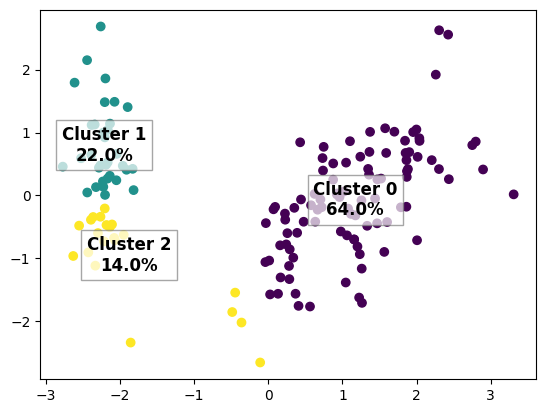

In [23]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
# Show label and percentage for each cluster
unique, counts = np.unique(clusters, return_counts=True)
for i, (label, count) in enumerate(zip(unique, counts)):
    percent = 100 * count / len(clusters)
    plt.text(
        X_pca[clusters == label, 0].mean(),
        X_pca[clusters == label, 1].mean(),
        f"Cluster {label}\n{percent:.1f}%",
        fontsize=12, weight='bold', ha='center', va='center',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray')
    )
df['cluster'] = clusters
print(df.head())
from sklearn.metrics import adjusted_rand_score
print("Adjusted Rand Index:", adjusted_rand_score(y, clusters))
